# Unsupervised learning

> ## ❓Questions
> - What is unsupervised learning?
> - How can we implement unsupervised learning techniques in python?

> ## ☑︎ Objectives
> - To understand the difference between unsupervised and supervised learning
> - To apply unsupervised methods such as k-means clustering, heirarchical clustering, PCA and t-SNE to data.

## What is unsupervised learning?

Unsupervised learning is a type of machine learning where the algorithm is trained on data that doesn't have labeled outcomes or predefined categories. Unlike supervised learning, which uses labeled datasets to train models to predict specific outcomes, unsupervised learning works with data that only includes inputs without corresponding output labels.

In this module we'll explore two key aspects of unsupervised learning:

1. Clustering: This involves grouping similar data points together based on their features. Common clustering algorithms include K-means and hierarchical clustering.

2. Dimensionality Reduction: This technique aims to reduce the number of features or dimensions in the data while preserving its essential structure. Methods like Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE) are used to simplify data into uncorrelated lower dimensions.


## The Iris Dataset

It consists of 150 observations of iris flowers, with each observation representing a different flower. The dataset includes four features:

1. Sepal Length: Length of the sepal in centimeters.
2. Sepal Width: Width of the sepal in centimeters.
3. Petal Length: Length of the petal in centimeters.
4. Petal Width: Width of the petal in centimeters.

Each observation is labeled with one of three species of iris: Iris-setosa, Iris-versicolor, or Iris-virginica. The Iris dataset is well-known for its simplicity and balanced class distribution, making it an excellent choice for testing and demonstrating machine learning algorithms.


Here, we'll explore the Iris dataset. Most of the code is provided for you, but you'll have to fill in some parts: these parts will be indicated with either `...` or `____`.

First lets import the python packages we'll be using for this module.

In [1]:
import warnings
warnings.simplefilter('ignore', category=UserWarning)
warnings.simplefilter('ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.utils import resample


# Set up plotting options for seaborn and matplotlib
sns.set_context('notebook')
sns.set_style('ticks')
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

## Dataset
We will be using the Iris dataset in order to demo unsupervised learning methods

In [50]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


There are three species (our target label)

In [3]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
iris_features = iris.iloc[:, 0:4]
iris_target = iris.iloc[:,4]
print(iris_features.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


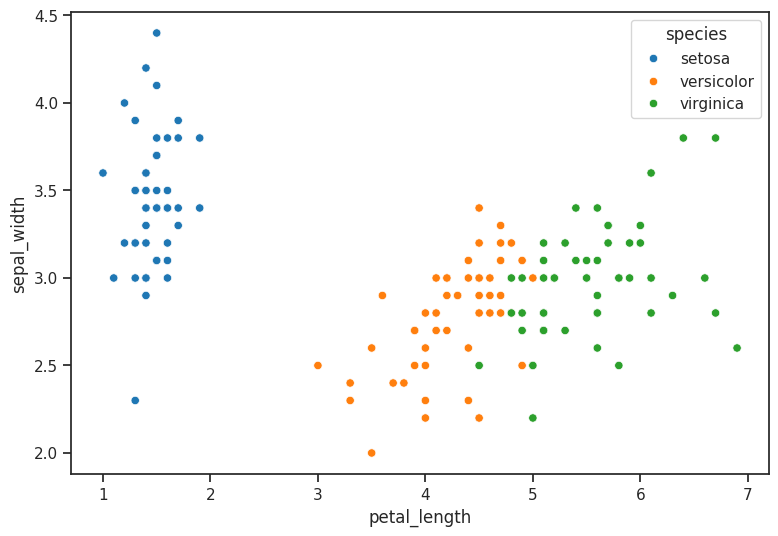

In [5]:
sns.scatterplot(x='petal_length',
                y='sepal_width',
                data=iris,
                hue=iris_target);

> ### ⚠️ Challenge 1
> Take a few moments to explore the Iris dataset.
> What can you learn? Which species do you think
> will be easier to separate?

## K-means clustering
K-means looks for a fixed number (k) of clusters in a dataset. The K-means algorithm:

- identifies k number of centroids
- allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
- performs iterative (repetitive) calculations to optimize the positions of the centroids

### Scale data

In [6]:
iris_features_sc = RobustScaler().fit_transform(iris_features)

### Try 2 clusters

In [7]:
model_kmeans_k2 = KMeans(n_clusters=2, random_state=0)
labels_k2 = model_kmeans_k2.fit_predict(iris_features_sc)

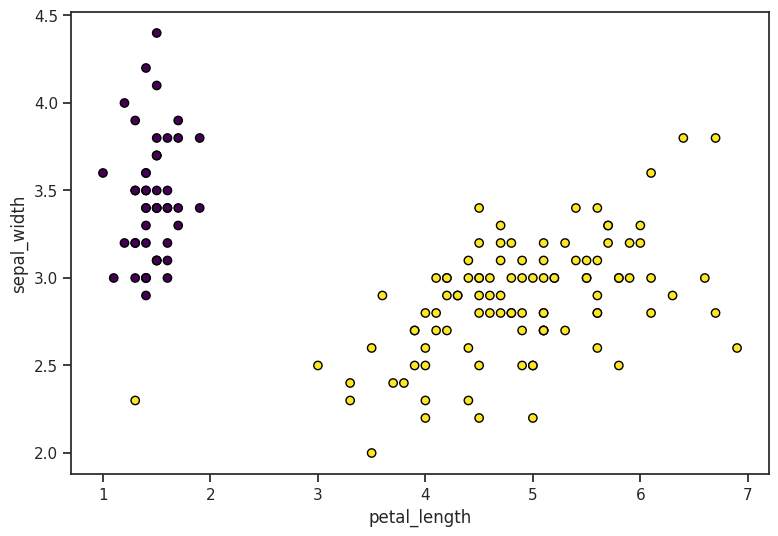

In [9]:
plt.scatter(iris['petal_length'], iris['sepal_width'], c=labels_k2, cmap='viridis', edgecolor='k')
plt.xlabel('petal_length')
plt.ylabel('sepal_width');

### Try 3 clusters

In [10]:
model_kmeans_k3 = KMeans(n_clusters=3, random_state=42)
labels_k3 = model_kmeans_k3.fit_predict(iris_features_sc)
# [x[:2] for x in iris['species'].to_list()]

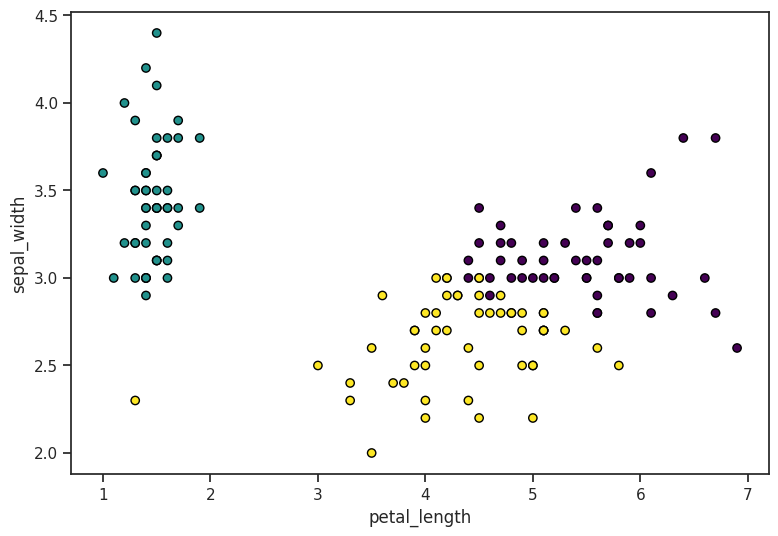

In [15]:
plt.scatter(iris['petal_length'], iris['sepal_width'], c=labels_k3, cmap='viridis', edgecolor='k')
plt.xlabel('petal_length')
plt.ylabel('sepal_width');

> ### ⚠️ Challenge 2  
> Choose whichever clustering approach you think worked best
> among the above. If you partition the data this way, which
> of the variables is most distinct in the clusters?

<details>
    <summary>Solution</summary>
        
```python
iris_clustered = iris.copy()
iris_clustered['prediction'] = labels_k3
iris_clustered.melt(id_vars=['prediction', 'species']) \
              .groupby(['prediction','variable']) \
              .mean('value')
```
</details>

In [27]:
# Use this cell to explore the data.

value
prediction variable              
0          petal_length  5.448980
           petal_width   1.944898
           sepal_length  6.738776
           sepal_width   3.106122
1          petal_length  1.465306
           petal_width   0.244898
           sepal_length  5.016327
           sepal_width   3.451020
2          petal_length  4.325000
           petal_width   1.396154
           sepal_length  5.778846
           sepal_width   2.640385

### Optimal number of clusters
One of the trickier tasks in clustering is identifying the appropriate number of clusters k.

In [28]:
from scipy.spatial.distance import cdist

k_range = np.arange(2,12)
silhouette_avgs = []
sum_squared_distances = []

for i, k in enumerate(k_range):
    model_kmeans = KMeans(n_clusters=k, random_state=2)
    label_kmeans = model_kmeans.fit_predict(iris_features_sc)
    silhouette_avgs.append(silhouette_score(iris_features_sc, label_kmeans))
    sum_squared_distances.append(model_kmeans.inertia_)

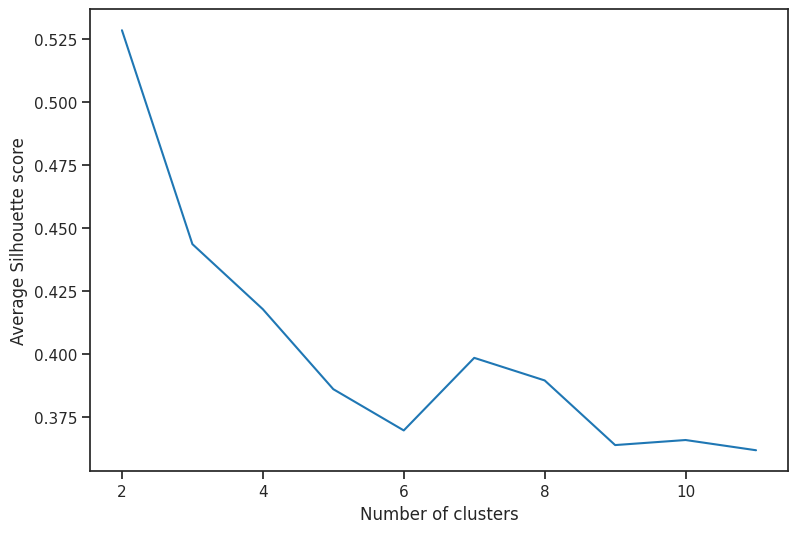

In [29]:
# Look for maximum
plt.plot(k_range, silhouette_avgs)
plt.ylabel('Average Silhouette score')
plt.xlabel('Number of clusters');

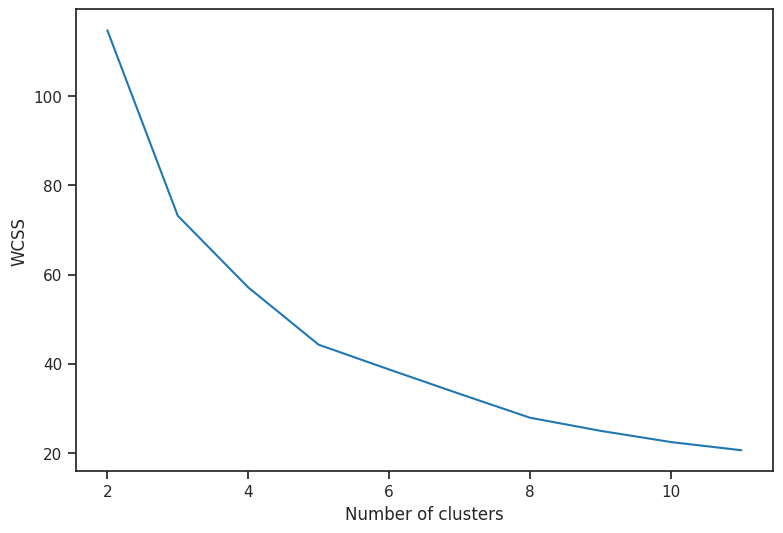

In [30]:
# look for elbow. Also known as Scree plot
plt.plot(k_range, sum_squared_distances)
plt.ylabel('WCSS') #within cluster sum of squared distances
plt.xlabel('Number of clusters');

## Hierarchical Clustering

The first step is to compute the distance between each sample, for which we will use the ward distance.

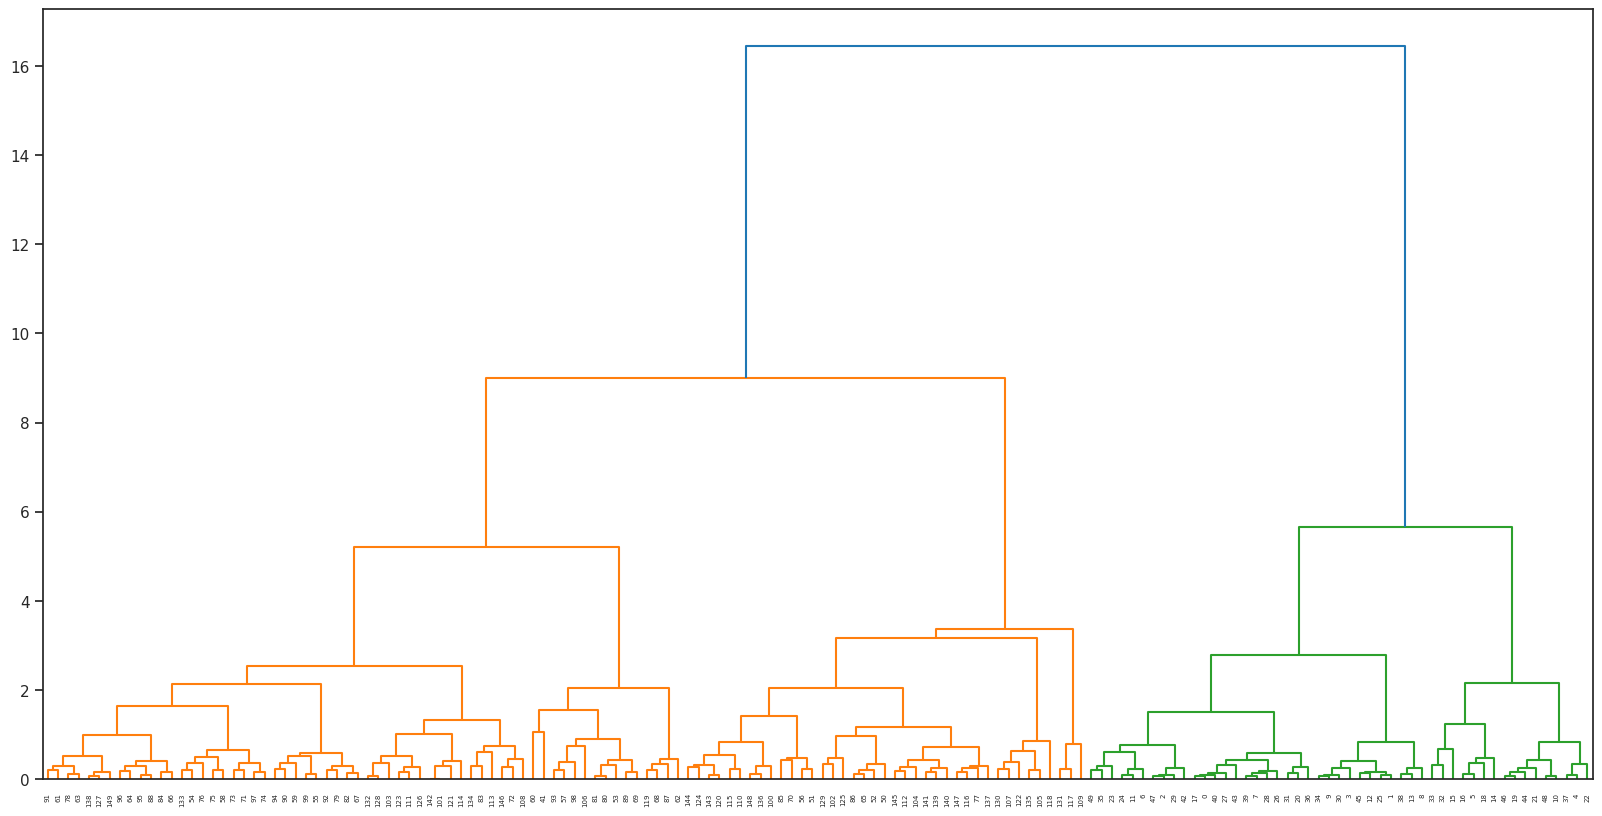

In [31]:
linked = linkage(iris_features_sc, method='ward')
f = plt.figure(figsize=(20, 10))
dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True
)
plt.show();

In [32]:
model_hclust = AgglomerativeClustering(n_clusters=3, linkage='ward')
iris_hc = model_hclust.fit(iris_features_sc)

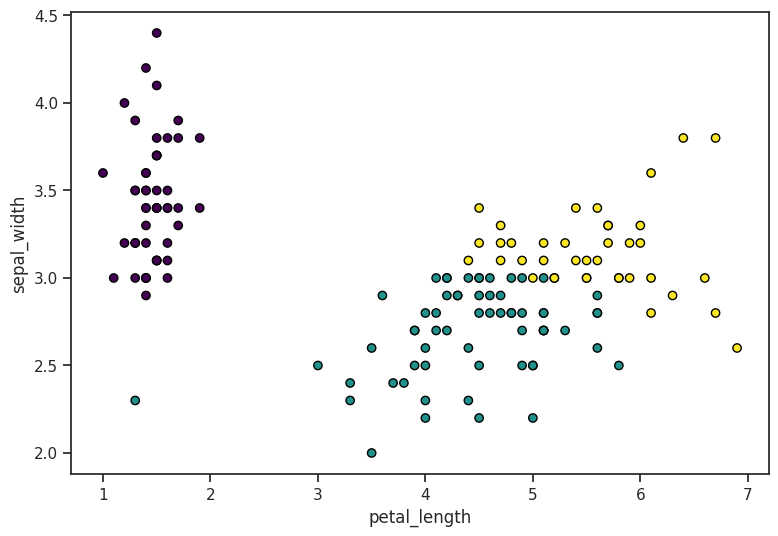

In [34]:
plt.scatter(iris['petal_length'], iris['sepal_width'],
            c=model_hclust.labels_,
            cmap='viridis',
            edgecolor='k')
plt.xlabel('petal_length')
plt.ylabel('sepal_width');

### Plotting data

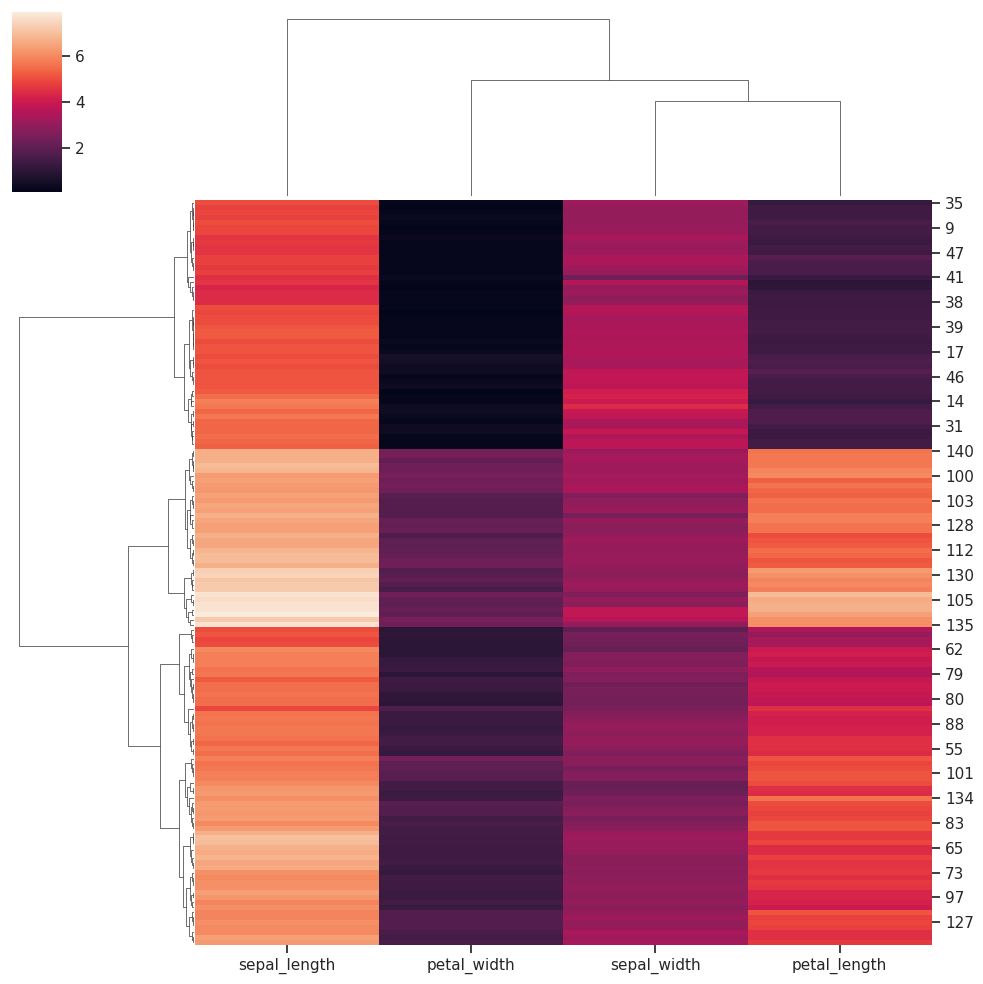

In [35]:
sns.clustermap(iris_features, method='ward');

!!! challenge "Challenge"
    Try constructing a heatmap using another method,
    and visualise the results.

    Do you think your approach is better or worse than the one
    proposed in the notes?
    Compare with your group…

    ??? "Solution"
        Compare with your neighbour

## Principal Component Analysis (PCA)

In [36]:
nPCs = 3
PCnames = ['PC1','PC2','PC3']
iris_pca = PCA(n_components=nPCs)
iris_reduced = iris_pca.fit_transform(iris_features)

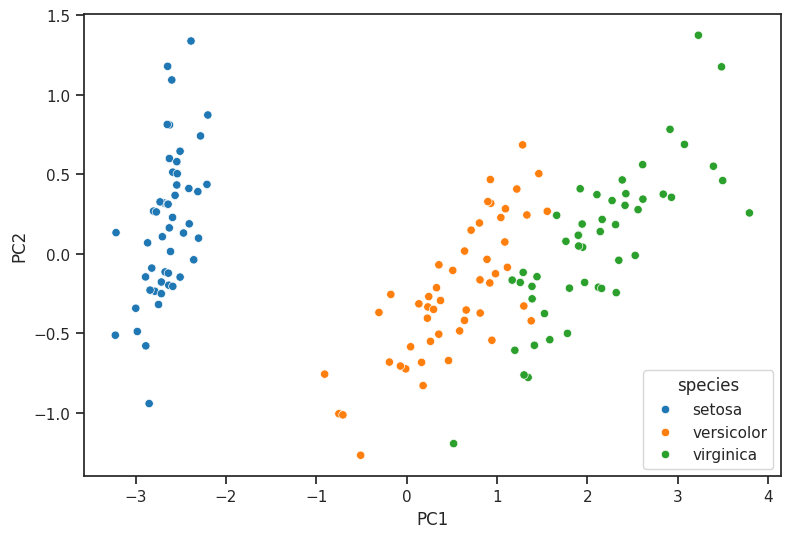

In [37]:
iris_PC_df = pd.DataFrame(iris_reduced, columns = PCnames)
sns.scatterplot(x='PC1',y='PC2', data=iris_PC_df, hue=iris_target);

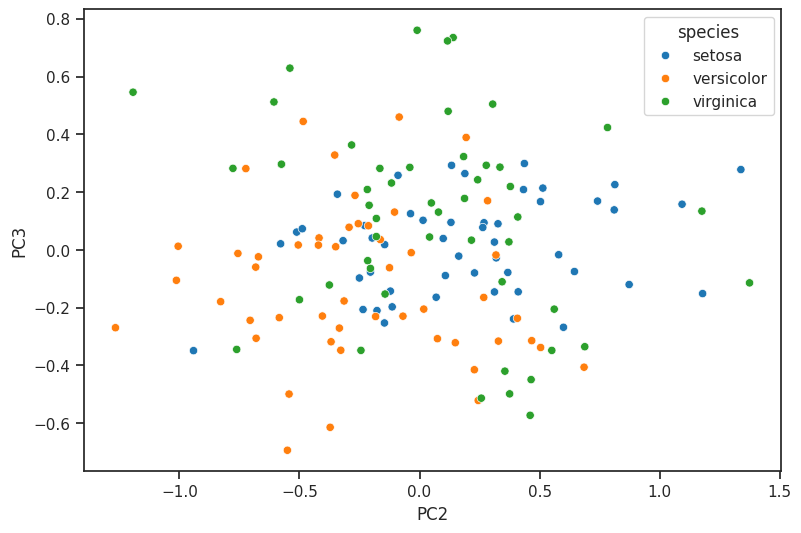

In [38]:
sns.scatterplot(x='PC2', y='PC3', data=iris_PC_df, hue=iris_target);

### Eigenvalues

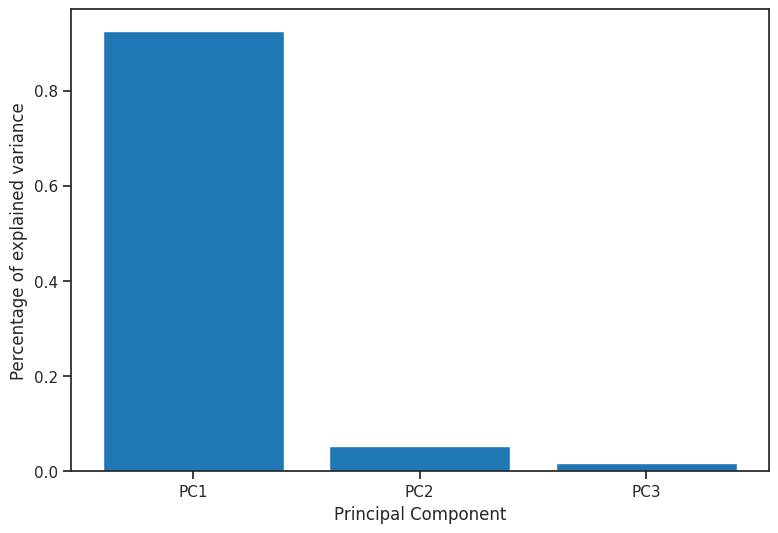

In [39]:
iris_eig = iris_pca.explained_variance_ratio_

x = np.arange(nPCs)
fig, ax = plt.subplots()
plt.bar(x, iris_eig)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Component')
plt.xticks(x, PCnames);

In [40]:
iris_comp = iris_pca.components_
iris_comp

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])

In [41]:
df_iris_comp = pd.DataFrame(iris_comp, columns=iris.columns.drop('species'), index=PCnames)
df_iris_comp

,sepal_length,sepal_width,petal_length,petal_width
PC1,0.361387,-0.084523,0.856671,0.358289
PC2,0.656589,0.730161,-0.173373,-0.075481
PC3,-0.582030,0.597911,0.076236,0.545831


In [42]:
df_iris_comp.T

,PC1,PC2,PC3
sepal_length,0.361387,0.656589,-0.582030
sepal_width,-0.084523,0.730161,0.597911
petal_length,0.856671,-0.173373,0.076236
petal_width,0.358289,-0.075481,0.545831


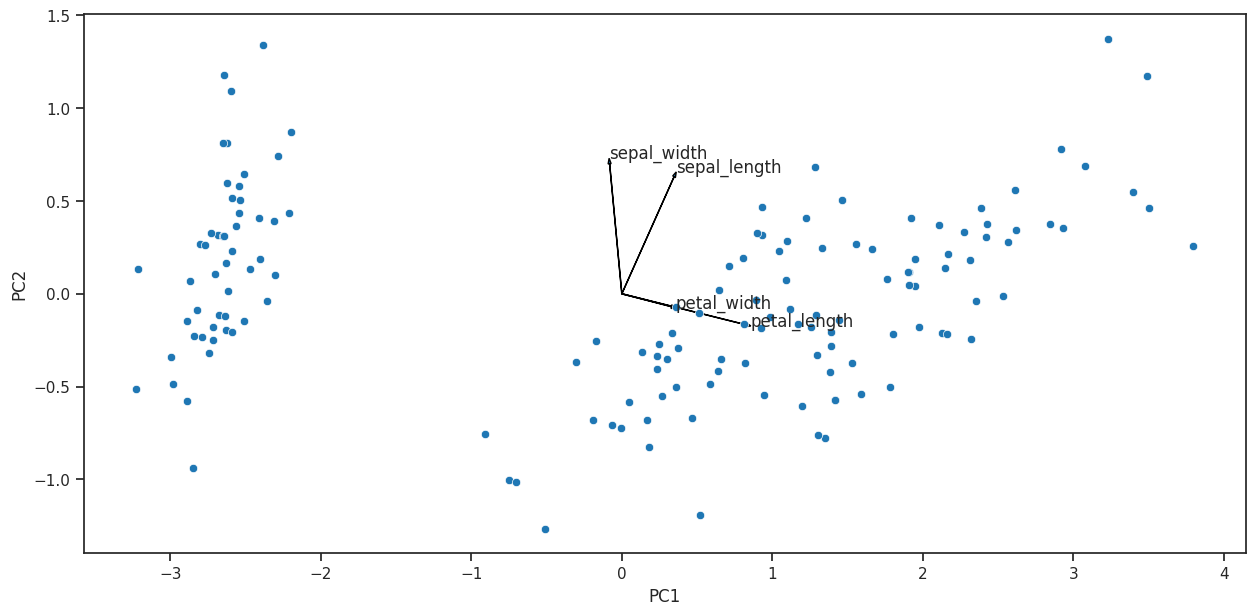

In [43]:
f = plt.figure(figsize=(15, 7))
ax = plt.axes()
for idx in range(df_iris_comp.T.index.shape[0]):
    ax.arrow(
        0, 0,
        df_iris_comp.T['PC1'][idx],
        df_iris_comp.T['PC2'][idx],
        head_width=0.02, ec='k',
        length_includes_head=True,
    )
    ax.annotate(df_iris_comp.columns[idx],
                xy=(df_iris_comp.T['PC1'][idx],
                    df_iris_comp.T['PC2'][idx]))
sns.scatterplot(x='PC1', y='PC2', data=iris_PC_df);

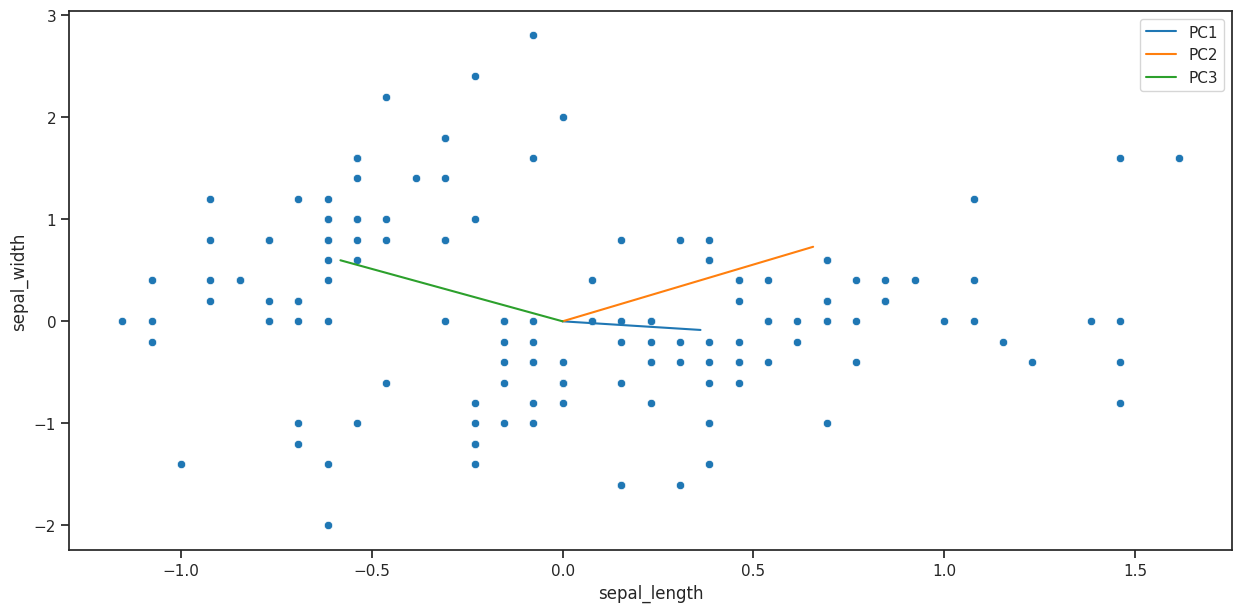

In [44]:
iris_scaled = pd.DataFrame(iris_features_sc, columns=iris_features.columns)

f = plt.figure(figsize=(15, 7))

for pc in np.arange(nPCs):
    plt.plot([0, iris_comp[pc, 0]], [0,iris_comp[pc,1]],
             label=PCnames[pc])
plt.xlabel(iris_features.columns[0])
plt.ylabel(iris_features.columns[1])
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris_scaled)
plt.legend();

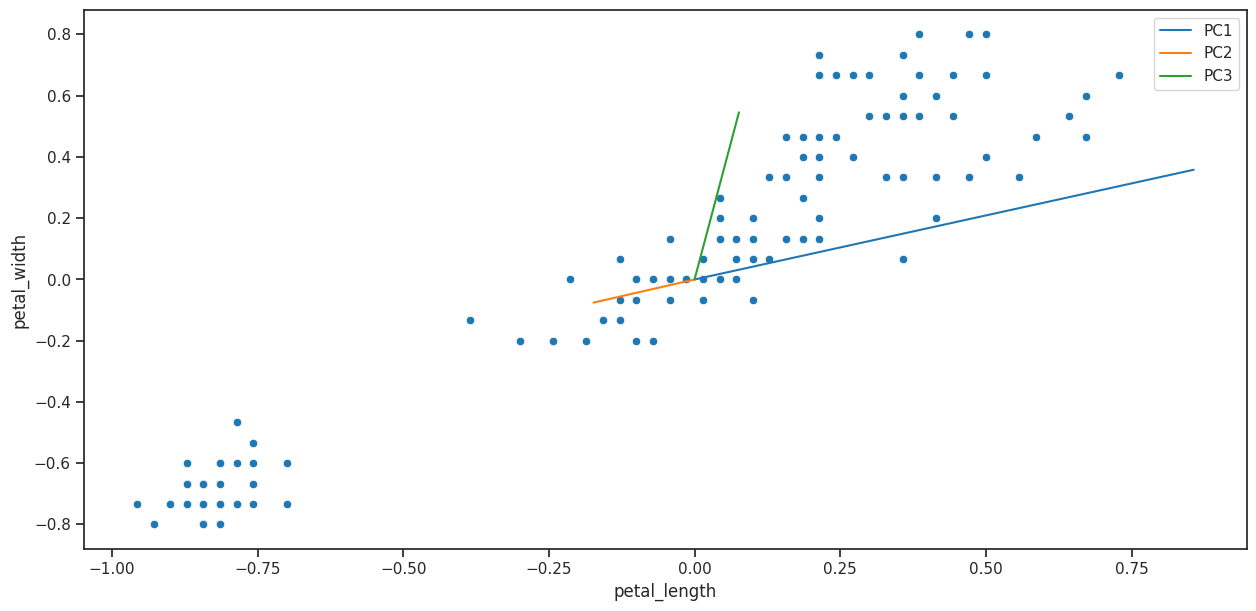

In [45]:
f = plt.figure(figsize=(15, 7))

for pc in np.arange(nPCs):
    plt.plot([0,iris_comp[pc,2]], [0,iris_comp[pc,3]], label=PCnames[pc])
plt.xlabel(iris_features.columns[2])
plt.ylabel(iris_features.columns[3])
sns.scatterplot(x='petal_length', y='petal_width', data=iris_scaled)
plt.legend();

If you need to generate more/better visualisations and exploration of your PCA outcome, R has much better "out of the box" visualisations to help you understand what is going on. See [here](https://pages.github.sydney.edu.au/informatics/lessons-mlr/90-Unsupervised.html) for our code for doing this on the iris dataset.

In [46]:
model_tsne = TSNE(n_components=2, perplexity=25, random_state=42)
iris_tsne = model_tsne.fit_transform(iris_features)

In [47]:
iris_tsne_df = pd.DataFrame(iris_tsne, columns = ['Dim1','Dim2'])
iris_tsne_df.head()

,Dim1,Dim2
0,-27.553335,4.165997
1,-30.986427,4.712584
2,-31.295948,3.321049
3,-31.611645,3.636552
4,-27.495888,4.696552


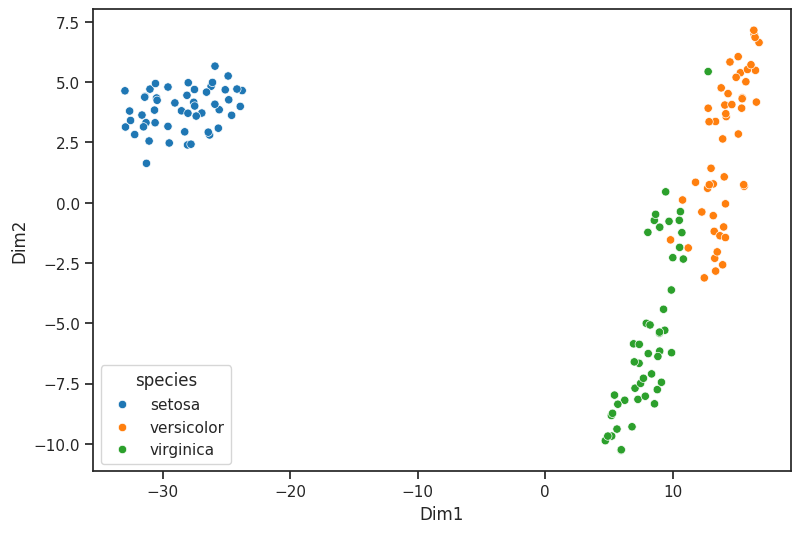

In [48]:
sns.scatterplot(x='Dim1',y='Dim2', data=iris_tsne_df, hue=iris_target);

!!! keypoints "Key points"  
    - Unsupervised learning is an approach where we use machine
      learning to search for patterns in the data
    - Clustering can help you identify groups in your data